In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in file

fname= "repd-january-2023.xlsx" 
repd = pd.read_excel(fname, sheet_name = 'REPD')
repd.head()


,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref
0,N00053B,1,2009-07-07,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaT,NaT,2004-09-03,NaT,NaT,NaT,NaT,2006-05-01,2007-05-01,NaN
1,AA110,2,2017-11-20,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
2,B0730,3,2020-06-04,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaT,NaT,2015-10-28,NaT,NaT,NaT,2020-10-28,2016-09-01,2019-12-20,NaN
3,1106000,4,2003-12-18,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,NaT,NaT,1995-05-05,NaT,NaT,NaT,NaT,NaT,1998-10-02,NaN
4,2047000,5,2005-09-29,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.8,No,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN


Initial review of data

In [3]:
repd.shape

(8487, 51)

In [4]:
repd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8487 entries, 0 to 8486
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Old Ref ID                               3919 non-null   object        
 1   Ref ID                                   8487 non-null   int64         
 2   Record Last Updated (dd/mm/yyyy)         8487 non-null   datetime64[ns]
 3   Operator (or Applicant)                  8408 non-null   object        
 4   Site Name                                8484 non-null   object        
 5   Technology Type                          8487 non-null   object        
 6   Storage Type                             1013 non-null   object        
 7   Storage Co-location REPD Ref ID          637 non-null    object        
 8   Installed Capacity (MWelec)              7937 non-null   float64       
 9   CHP Enabled                              

In [5]:
repd.value_counts('Development Status (short)') 

Development Status (short)
Operational                    2827
Awaiting Construction          1739
Application Submitted           986
Application Refused             973
Application Withdrawn           507
Revised                         483
Abandoned                       367
Planning Permission Expired     277
Under Construction              239
Appeal Withdrawn                 48
Decommissioned                   31
No Application Required           6
Appeal Lodged                     4
dtype: int64

In [6]:
# only include installations that are operational, under constrction or awaiting construction
repd = repd[
                (repd['Development Status (short)'] == 'Operational' )| 
                (repd['Development Status (short)'] == 'Awaiting Construction' )| 
                (repd['Development Status (short)'] == 'Under Construction' ) 
               ]

In [7]:
#remove installations where the capacity is unknown

repd.dropna(subset=['Installed Capacity (MWelec)'], inplace = True)

In [8]:
repd.shape

(4528, 51)

In [9]:
# select subset of data required for reviewing capacity
useage = repd[['Technology Type', 'Installed Capacity (MWelec)', 'CfD Capacity (MW)', 'Development Status (short)' ]]
useage

,Technology Type,Installed Capacity (MWelec),CfD Capacity (MW),Development Status (short)
0,Biomass (co-firing),35.000,NaN,Operational
2,EfW Incineration,70.000,NaN,Operational
3,Biomass (dedicated),38.500,NaN,Operational
13,Biomass (dedicated),18.000,NaN,Operational
16,Biomass (dedicated),1.500,NaN,Operational
...,...,...,...,...
8353,Solar Photovoltaics,50.000,NaN,Awaiting Construction
8354,Battery,20.000,NaN,Awaiting Construction
8376,Hydrogen,0.900,NaN,Under Construction
8384,Solar Photovoltaics,0.225,NaN,Awaiting Construction


In [10]:
useage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528 entries, 0 to 8398
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Technology Type              4528 non-null   object 
 1   Installed Capacity (MWelec)  4528 non-null   float64
 2   CfD Capacity (MW)            125 non-null    float64
 3   Development Status (short)   4528 non-null   object 
dtypes: float64(2), object(2)
memory usage: 176.9+ KB


## Initial plots 

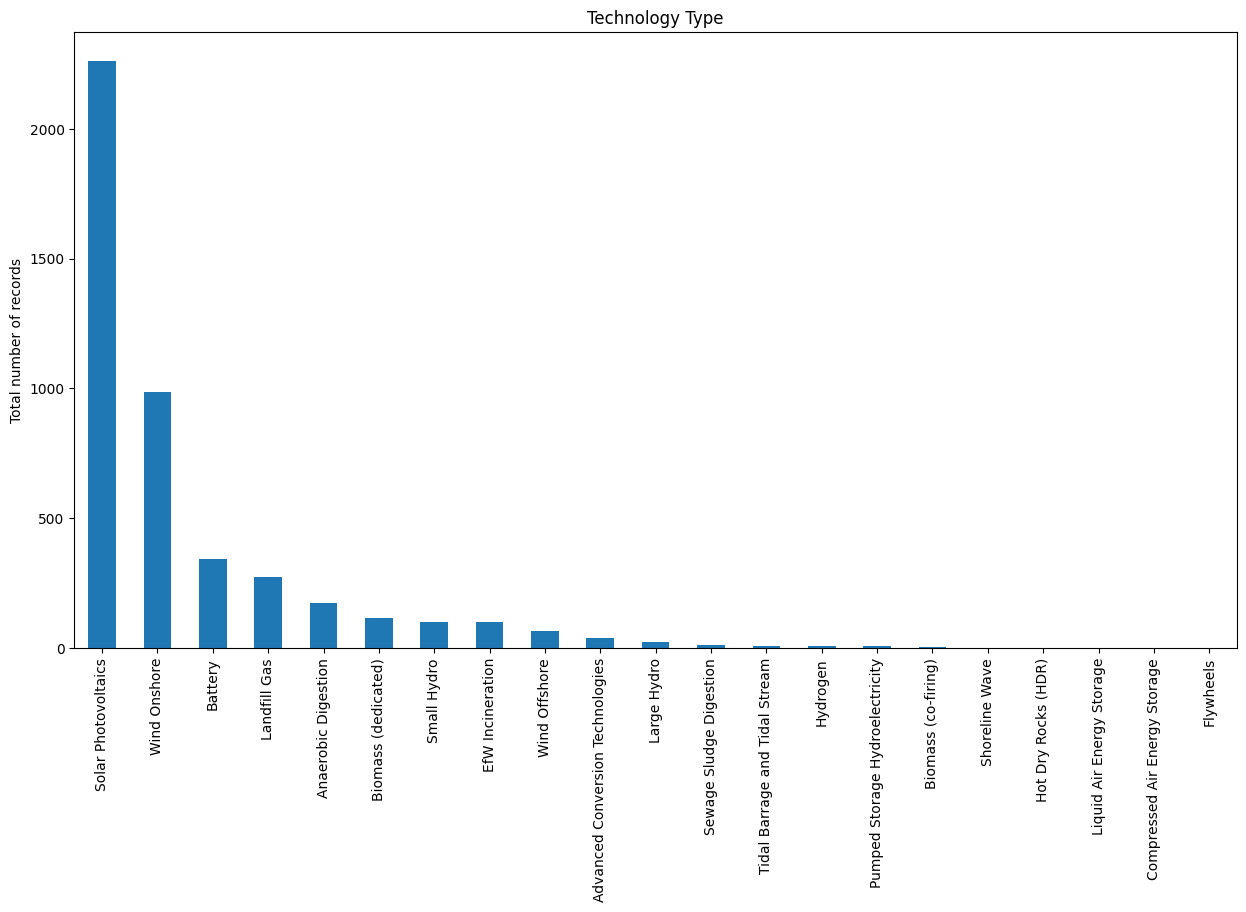

In [11]:
# what types of installtions and numbers 

types = useage.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type')
plt.xticks(rotation = 90)
plt.ylabel('Total number of records')
plt.xlabel('')
plt.show()


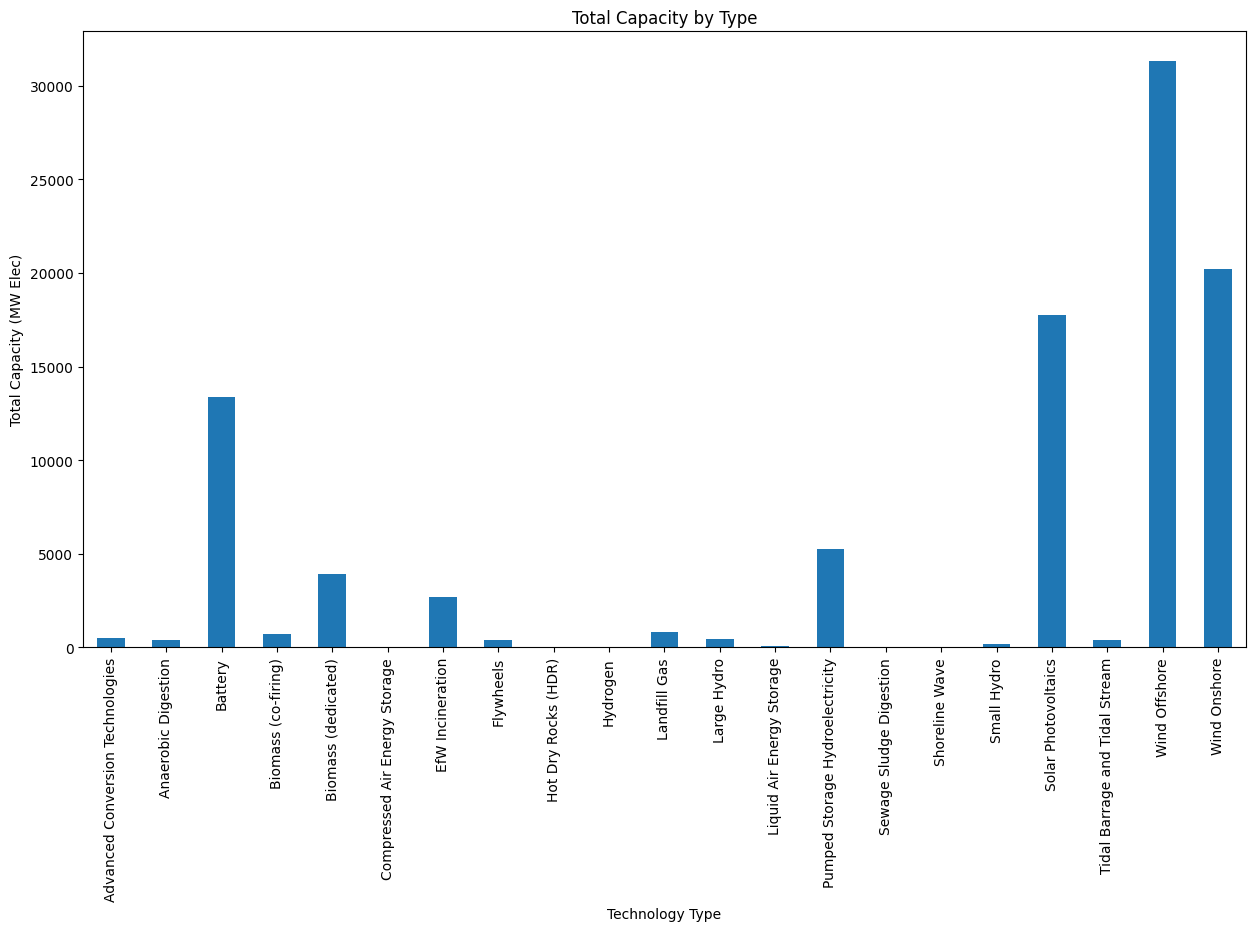

In [12]:
#WHat is the capacity?

# group by technology type and then total the installed capcity to get total for each type

type_grouped = useage.groupby('Technology Type')['Installed Capacity (MWelec)'].sum()

type_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Total Capacity by Type')
plt.xticks(rotation = 90)
plt.ylabel('Total Capacity (MW Elec)')

plt.show()

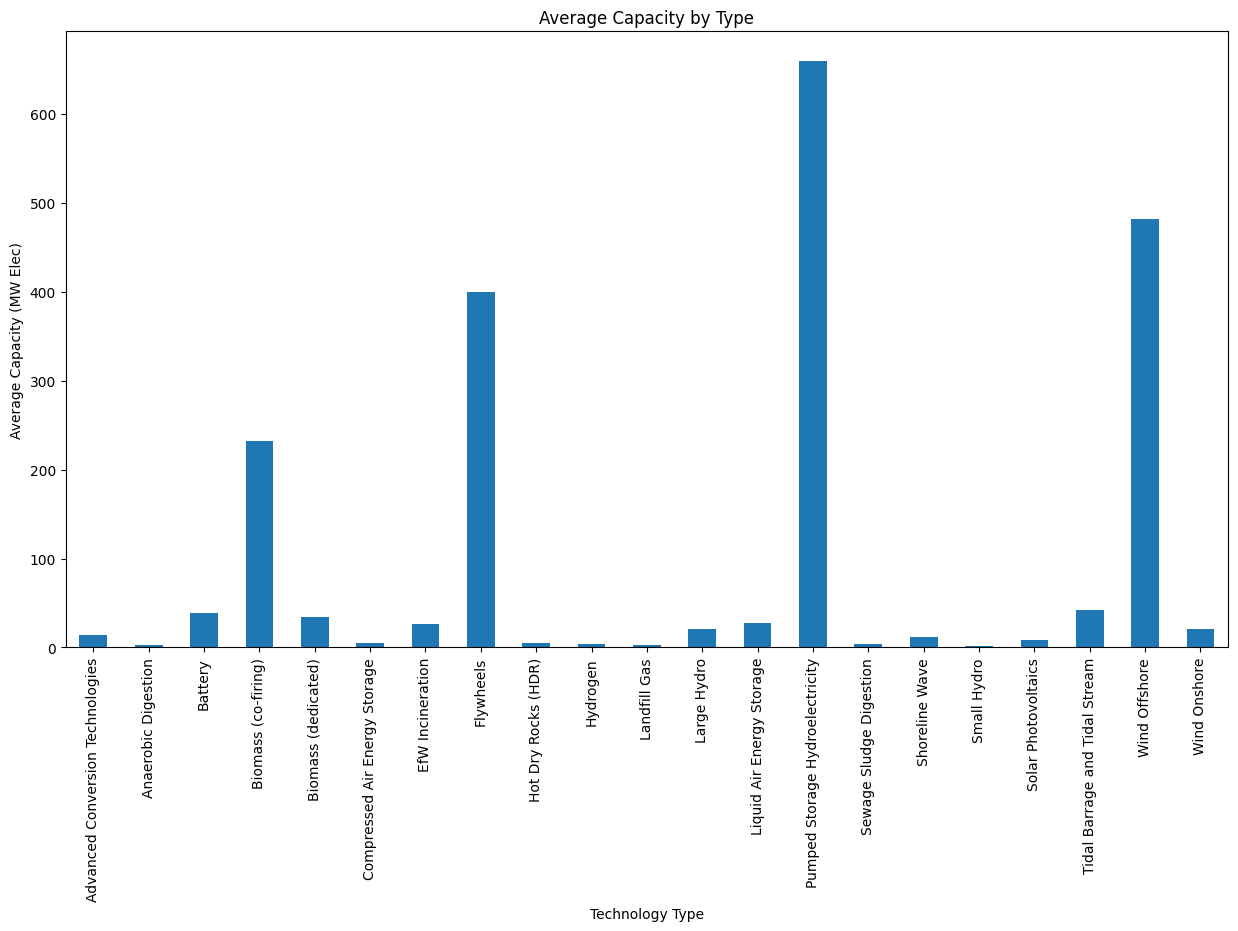

In [13]:
#What is the average for each technology type?

type_mean = useage.groupby('Technology Type')['Installed Capacity (MWelec)'].mean()

type_mean.plot(kind = 'bar', figsize=(15,8))

plt.title('Average Capacity by Type')
plt.xticks(rotation = 90)
plt.ylabel('Average Capacity (MW Elec)')

plt.show()

## operational only

In [14]:
operational = useage.loc[useage['Development Status (short)'] == 'Operational']
operational

,Technology Type,Installed Capacity (MWelec),CfD Capacity (MW),Development Status (short)
0,Biomass (co-firing),35.000,NaN,Operational
2,EfW Incineration,70.000,NaN,Operational
3,Biomass (dedicated),38.500,NaN,Operational
13,Biomass (dedicated),18.000,NaN,Operational
16,Biomass (dedicated),1.500,NaN,Operational
...,...,...,...,...
7506,Anaerobic Digestion,1.000,NaN,Operational
7519,Wind Onshore,1.000,NaN,Operational
8071,Battery,20.000,NaN,Operational
8095,Solar Photovoltaics,0.299,NaN,Operational


In [15]:
operational.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 0 to 8334
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Technology Type              2802 non-null   object 
 1   Installed Capacity (MWelec)  2802 non-null   float64
 2   CfD Capacity (MW)            32 non-null     float64
 3   Development Status (short)   2802 non-null   object 
dtypes: float64(2), object(2)
memory usage: 109.5+ KB


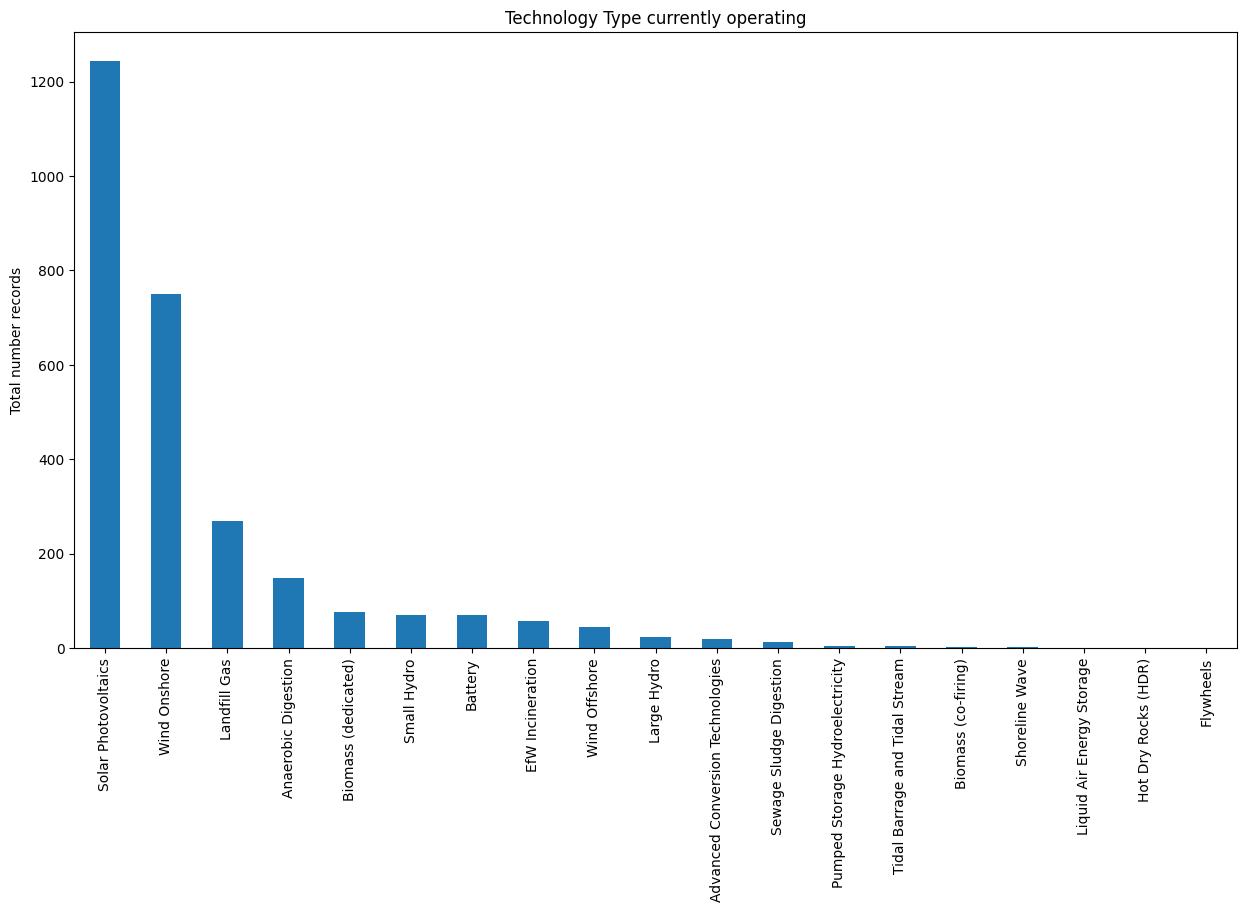

In [16]:
op_types = operational.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type currently operating')
plt.xticks(rotation = 90)
plt.ylabel('Total number records')
plt.xlabel('')
plt.show()

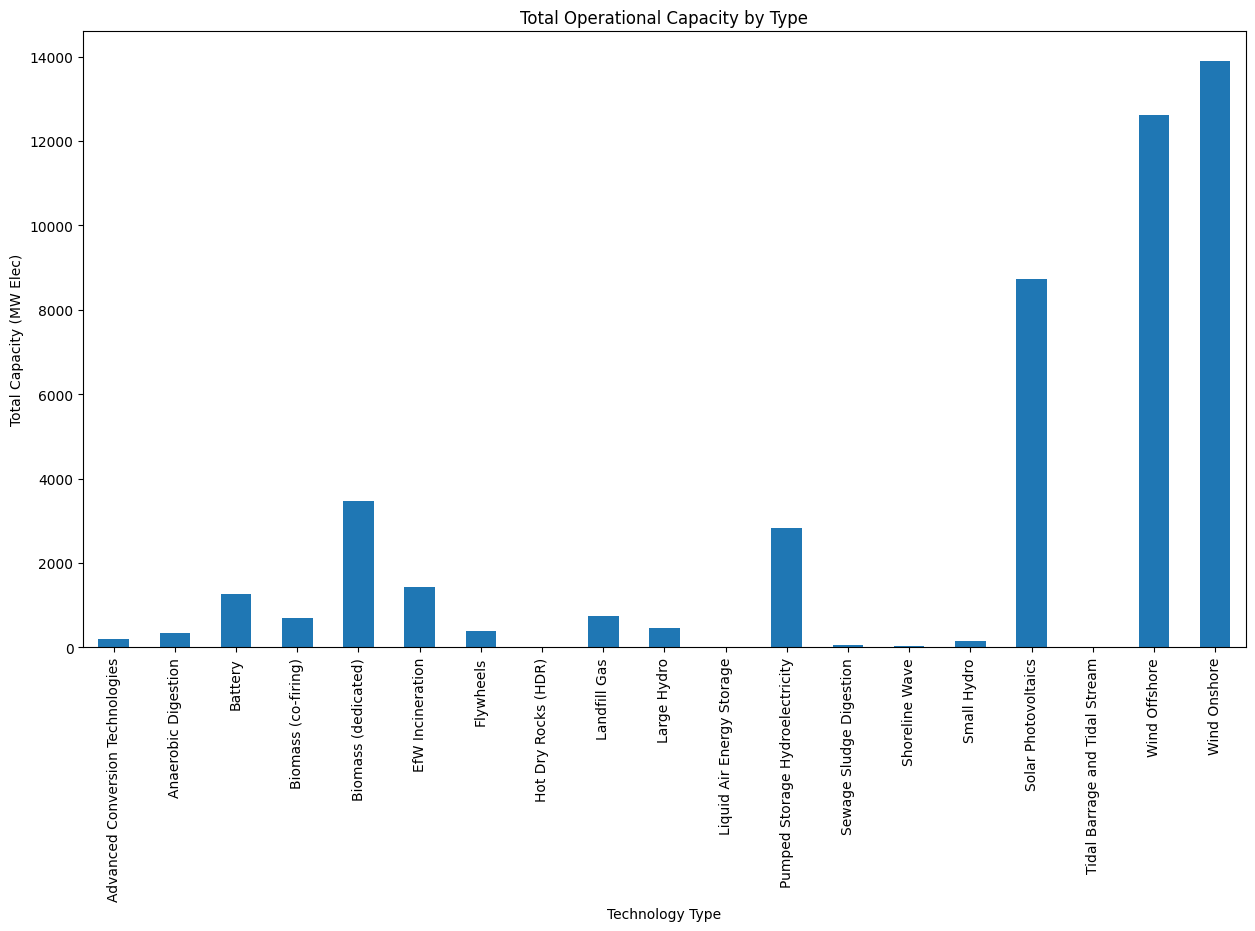

In [17]:
op_grouped = operational.groupby('Technology Type')['Installed Capacity (MWelec)'].sum()

op_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Total Operational Capacity by Type')
plt.xticks(rotation = 90)
plt.ylabel('Total Capacity (MW Elec)')

plt.show()

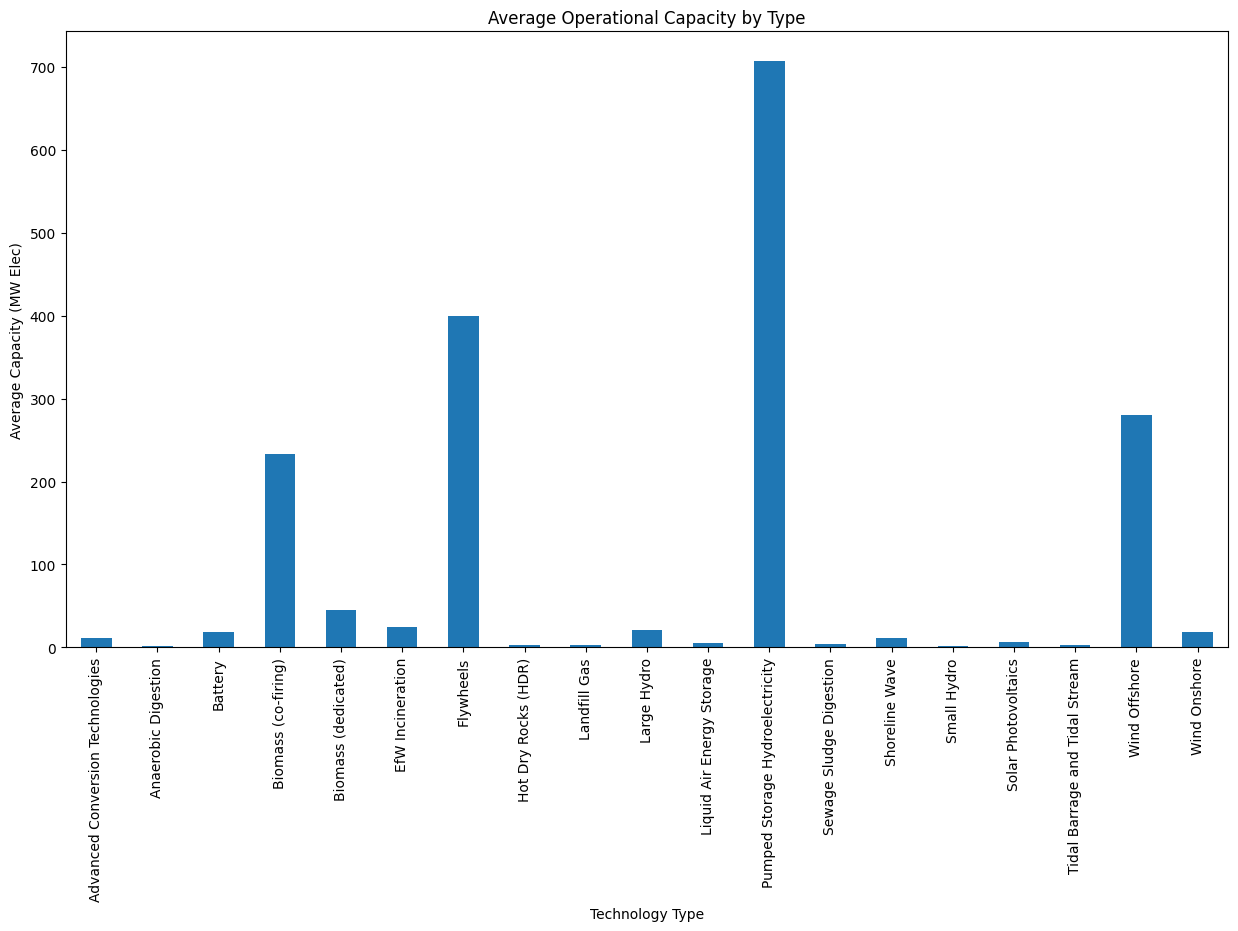

In [18]:
op_grouped = operational.groupby('Technology Type')['Installed Capacity (MWelec)'].mean()

op_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Average Operational Capacity by Type')
plt.xticks(rotation = 90)
plt.ylabel('Average Capacity (MW Elec)')

plt.show()

In [19]:
type_range= repd.groupby('Technology Type').agg({'Installed Capacity (MWelec)':["min", "max","mean","median","count"]})
type_range

Installed Capacity (MWelec)          \
                                                         min     max   
Technology Type                                                        
Advanced Conversion Technologies                       1.100    48.0   
Anaerobic Digestion                                    0.200    19.0   
Battery                                                0.100   400.0   
Biomass (co-firing)                                   18.000   645.0   
Biomass (dedicated)                                    0.156   645.0   
Compressed Air Energy Storage                          5.000     5.0   
EfW Incineration                                       1.200   100.0   
Flywheels                                            400.000   400.0   
Hot Dry Rocks (HDR)                                    3.000     7.0   
Hydrogen                                               0.800    10.0   
Landfill Gas                                           1.000    22.5   
Large Hydro                                            5.000   100.0   
Liquid Air Energy Storage                              5.000    49.9   
Pumped Storage Hydroelectricity                       99.900  1728.0   
Sewage Sludge Digestion                                1.100     9.7   
Shoreline Wave                                         1.000    23.0   
Small Hydro                                            0.185     4.5   
Solar Photovoltaics                                    0.150   350.0   
Tidal Barrage and Tidal Stream                         0.500   240.0   
Wind Offshore                                          7.000  2400.0   
Wind Onshore                                           0.150   443.0   

                                                            
                                        mean  median count  
Technology Type                                             
Advanced Conversion Technologies   13.760526   10.10    38  
Anaerobic Digestion                 2.366570    1.85   172  
Battery                            38.857703   25.00   344  
Biomass (co-firing)               232.666667   35.00     3  
Biomass (dedicated)                34.582939    5.25   114  
Compressed Air Energy Storage       5.000000    5.00     1  
EfW Incineration                   26.591089   20.10   101  
Flywheels                         400.000000  400.00     1  
Hot Dry Rocks (HDR)                 5.000000    5.00     2  
Hydrogen                            4.250000    3.40     8  
Landfill Gas                        2.940511    2.00   274  
Large Hydro                        20.460870   15.00    23  
Liquid Air Energy Storage          27.450000   27.45     2  
Pumped Storage Hydroelectricity   659.737500  420.00     8  
Sewage Sludge Digestion             4.183333    4.75    12  
Shoreline Wave                     12.000000   12.00     2  
Small Hydro                         1.741029    1.85   102  
Solar Photovoltaics                 7.858392    4.40  2260  
Tidal Barrage and Tidal Stream     41.988889    6.00     9  
Wind Offshore                     481.986154  286.50    65  
Wind Onshore                       20.464630    9.20   987

## What are the capacity distributions for solar and wind 

In [20]:
# subset data for solar only and the installed calacity

solar =  repd[['Technology Type', 'Installed Capacity (MWelec)']]
solar = solar [(solar['Technology Type'] == 'Solar Photovoltaics' )]

In [21]:
solar.describe()

,Installed Capacity (MWelec)
count,2260.000000
mean,7.858392
std,14.059057
min,0.150000
25%,0.605750
50%,4.400000
75%,7.625000
max,350.000000


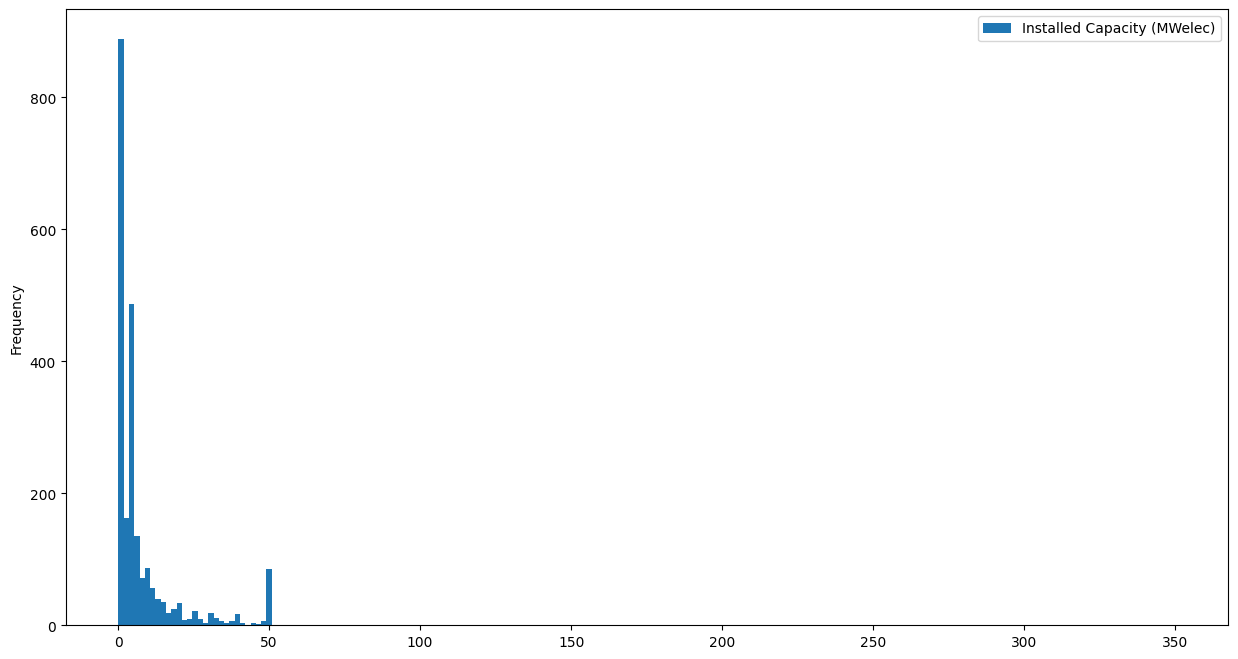

In [22]:
solar.plot(kind = 'hist', bins =200, figsize=(15,8))
plt.show()

## high number of installations at low capacity

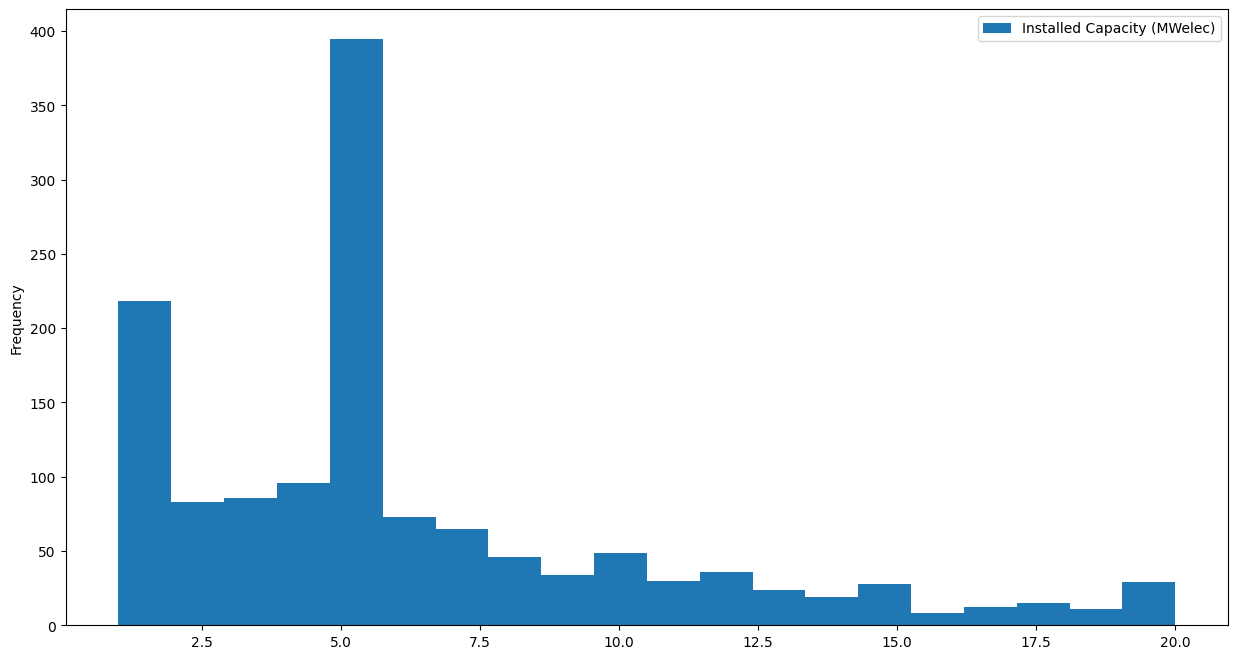

In [23]:
#narrow the range to lower bins only
solar.plot(kind = 'hist', range=[1, 20], bins =20, figsize=(15,8))
plt.show()

In [24]:
# subset the adta for onshore wind and number of turbines

os_wind =  repd[['Technology Type', 'No. of Turbines']]
os_wind = os_wind [(os_wind['Technology Type'] == 'Wind Onshore' )]

In [25]:
os_wind.describe()

,No. of Turbines
count,985.000000
mean,8.801015
std,12.480595
min,1.000000
25%,2.000000
50%,5.000000
75%,11.000000
max,152.000000


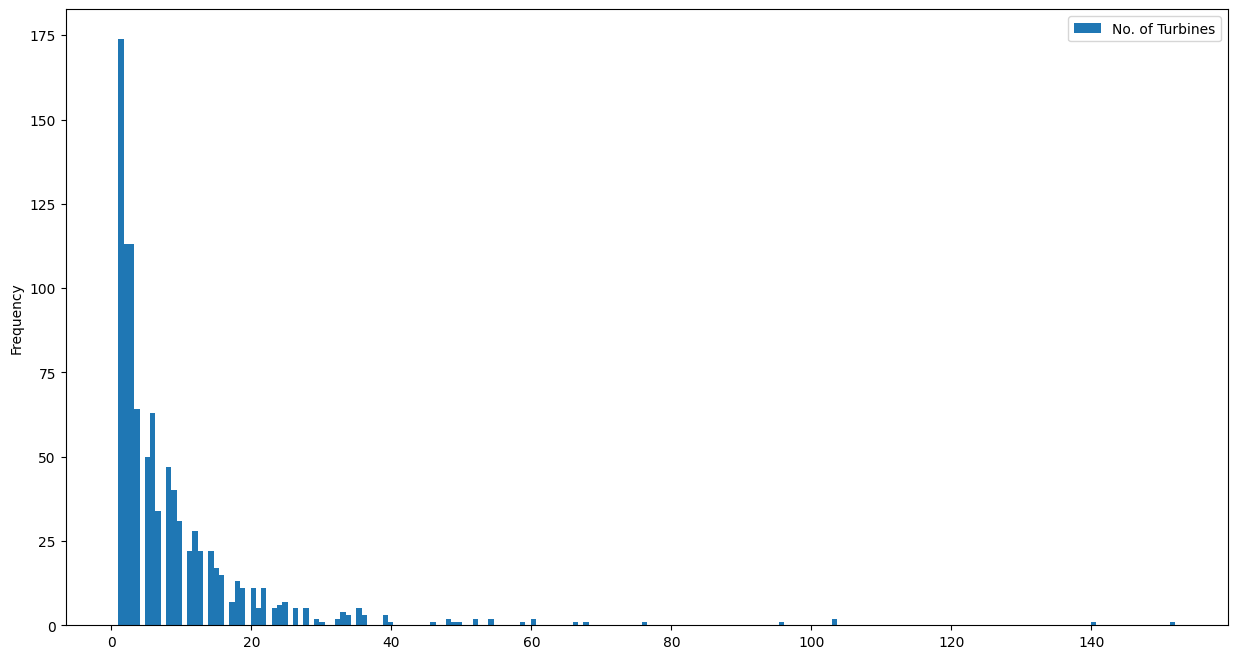

In [26]:
os_wind.plot(kind = 'hist', bins =200, figsize=(15,8))
plt.show()


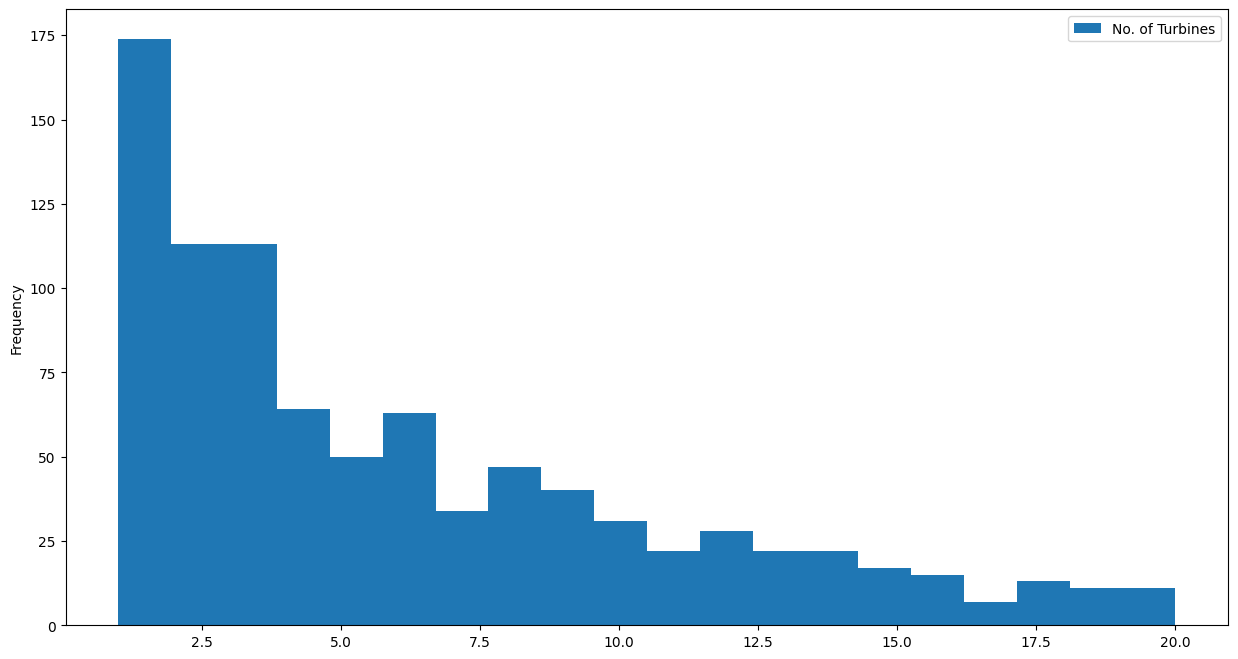

In [27]:
# narrow to lower range

os_wind.plot(kind = 'hist', range=[1, 20], bins =20, figsize=(15,8))
plt.show()

## again large number of installations with small numbers of turbines

## Are there any particular groups of operators/applicants worth reviewing further?


In [28]:
repd.head()

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref
0,N00053B,1,2009-07-07,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaT,NaT,2004-09-03,NaT,NaT,NaT,NaT,2006-05-01,2007-05-01,NaN
2,B0730,3,2020-06-04,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaT,NaT,2015-10-28,NaT,NaT,NaT,2020-10-28,2016-09-01,2019-12-20,NaN
3,1106000,4,2003-12-18,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,NaT,NaT,1995-05-05,NaT,NaT,NaT,NaT,NaT,1998-10-02,NaN
13,A0331,14,2012-04-04,Dalkia,Chilton Energy Plant,Biomass (dedicated),NaN,NaN,18.0,No,...,NaT,NaT,2009-11-24,NaT,NaT,NaT,NaT,2010-03-01,2012-03-12,NaN
16,AA851,22,2012-08-10,Double H Nurseries,Double H Nurseries Biomass Plant,Biomass (dedicated),NaN,NaN,1.5,Yes,...,NaT,NaT,2012-05-29,NaT,NaT,NaT,NaT,NaT,2012-12-15,NaN


In [42]:
operators =  repd[['Operator (or Applicant)','Technology Type', 'Installed Capacity (MWelec)','CfD Capacity (MW)' ]]

In [47]:
operators.value_counts('Operator (or Applicant)').head(30)

Operator (or Applicant)
Private Developer                     142
Lightsource Renewable Energy          122
Scottish and Southern Energy (SSE)     55
Anesco                                 46
Waste Recycling Group                  45
WM Morrisons Supermarkets Plc          41
Scottish Power Renewables              32
Renewable Energy Systems (RES)         29
Biffa                                  29
RWE npower                             23
Foresight                              23
British Solar Renewables               22
Lark Energy                            21
Viridor                                20
Push Energy                            20
EDF Energy Renewables                  19
SITA UK                                19
Green Cat Renewables                   18
Lightsource BP                         18
Wessex Solar Energy                    17
Natural Power                          17
Ecotricity                             17
Elgin Energy EsCo                      16
TGC Renewa

Lightsource is a BP company who install solar farms  https://lightsourcebp.com/uk/

#### Look at those that are approved for CfD as these may be better options for investment in terms of ROI

In [44]:
 # remove CfD Nan

cfd = operators.dropna(subset=['CfD Capacity (MW)'], inplace = False)

In [45]:
cfd

,Operator (or Applicant),Technology Type,Installed Capacity (MWelec),CfD Capacity (MW)
48,Plymouth Hospital NHS Trust,Biomass (dedicated),1.5,0.64
91,"SSE/Equinor (formerly Statoil, formerly Forewind)",Wind Offshore,2400.0,2400.00
96,Scottish Power Renewables,Wind Offshore,714.0,714.00
128,Scottish & Southern Energy (SSE) / Repsol / CIP,Wind Offshore,588.0,664.00
149,Orsted (formerly Dong Energy),Wind Offshore,660.0,660.00
...,...,...,...,...
6701,Enso Energy Limited,Solar Photovoltaics,40.0,40.00
7177,Docking Farm Solar Limited,Solar Photovoltaics,28.0,6.00
8074,BayWa r.e. UK Limited,Solar Photovoltaics,45.0,30.00
8076,BayWa r.e. UK Limited,Solar Photovoltaics,49.9,49.90


In [46]:
cfd.value_counts('Operator (or Applicant)').head(20)

Operator (or Applicant)
BayWa r.e. UK Limited                                6
Scottish Power Renewables                            6
Lightsource BP                                       5
Orsted (formerly Dong Energy)                        5
Elgin Energy                                         4
Moray East (formerly MORL)/ EDPR                     3
Banks Renewables                                     3
Anesco Limited                                       3
Intelligent Alternatives                             2
Enso Energy Limited                                  2
SSE/Equinor (formerly Statoil, formerly Forewind)    2
Innogy                                               2
Innova Renewables Limited                            2
JBM Solar Projects Limited                           2
Vantage RE                                           2
Low Carbon                                           2
British Solar Renewables / BayWa r.e. UK Limited     2
Voltalia UK                              